In [119]:
import pickle
import numpy as np
from collections import defaultdict
import statistics
import matplotlib.pyplot as plt

## Analyzing the search over the space of publishing policies

In this analysis...
- num_bins = 3
- num_draws = 10
- num_participants = 10
- num_generations = 5

In [124]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/publishing_policies_3_bins.p", 'rb')
outputs = pickle.load(file)

### Graphic to show relationship between supporting data and given metrics

In [125]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [126]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[0]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

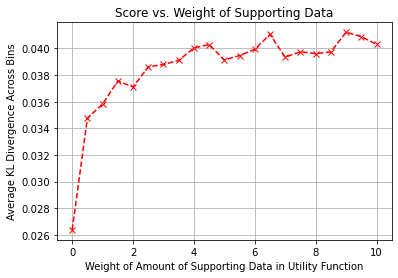

In [127]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Supporting Data in Utility Function')
plt.ylabel('Average KL Divergence Across Bins')
plt.title('Score vs. Weight of Supporting Data')

# plt.legend()

plt.grid(True)
plt.show()

### Graphic to show relationship between surprise level and given metrics

In [128]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [129]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[1]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

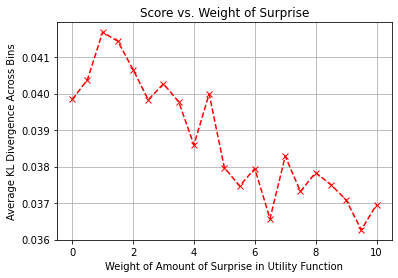

In [130]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Surprise in Utility Function')
plt.ylabel('Average KL Divergence Across Bins')
plt.title('Score vs. Weight of Surprise')

# plt.legend()

plt.grid(True)
plt.show()

### Graphic to show relationship between publication bias and given metrics

In [100]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][0])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y1 = []
for key in median_values:
    y1.append(key[1])

In [101]:
grouped_data = defaultdict(list)

for i in outputs:
    grouped_data[i[2]].append(outputs[i][1])

median_values = []

for key, values in grouped_data.items():
    median = statistics.median(values)
    median_values.append((key, median))

median_values.sort(key=lambda x: x[0])

y2 = []
for key in median_values:
    y2.append(key[1])

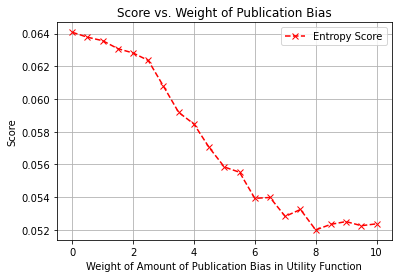

In [102]:
x = np.linspace(0, 10, 21)

# plt.plot(x, y1, label='Arm Score', marker='o', linestyle='-', color='blue')
plt.plot(x, y2, label='Entropy Score', marker='x', linestyle='--', color='red')

plt.xlabel('Weight of Amount of Publication Bias in Utility Function')
plt.ylabel('Score')
plt.title('Score vs. Weight of Publication Bias')

plt.legend()

plt.grid(True)
plt.show()

## Show score over generations for a fixed setting

In [131]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/average_KL_per_generation.p", 'rb')
average_KL_per_generation = pickle.load(file)

In [132]:
x = []
y = []

for gen_no in average_KL_per_generation:
    x.append(gen_no)
    y.append(average_KL_per_generation[gen_no])

No handles with labels found to put in legend.


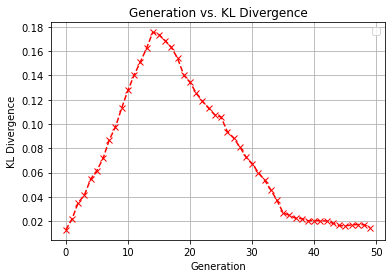

In [133]:
plt.plot(x, y, marker='x', linestyle='--', color='red')

plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('Generation vs. KL Divergence')

plt.legend()

plt.grid(True)
plt.show()

## Show scores for different probabilities

In [173]:
file = open("/Users/marinamancoridis/Thesis/Thesis_Simulations/final_map.p", 'rb')
final_map = pickle.load(file)
x = []

for gen_no in final_map[0]:
    x.append(gen_no)

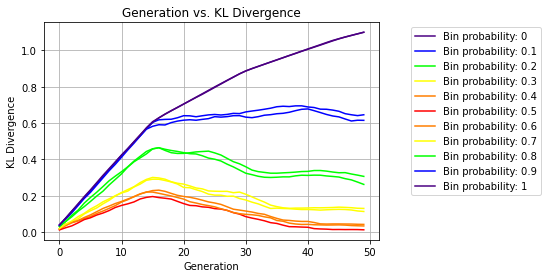

In [174]:
rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF', '#FF00FF', '#FF1493', '#FF4500', '#FFD700']

count = 0
for key in final_map:
    y = []
    for gen_no in final_map[key]:
        y.append(final_map[key][gen_no])

    plt.plot(x, y, label=f"Bin probability: {key}", color=rainbow_colors[abs(count - 5)])
    count += 1

plt.xlabel('Generation')
plt.ylabel('KL Divergence')
plt.title('Generation vs. KL Divergence')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))

plt.grid(True)
plt.show()